## IRIS Data Classifier

## Table of Contents
1. [Problem Statement](#section1)<br>
2. [Data Loading, Exploration (Investigation) and Pre-Processing](#section2)<br>
      - 2.1 [Import Packages](#section201)<br>
      - 2.2 [Load data from CSV file](#section202)<br>
      - 2.3 [Data Profling](#section203)<br>
3. [Data Visualization](#section3)<br>
      - 3.1 [Check the correlations among the features ](#section301)<br>
      - 3.2 [Different plots](#section302)<br>
4. [Model Training and Prediction](#section4)<br>
      - 4.1 [Splitting X and Y into training and test datasets](#section401)<br>  
      - 4.2 [Applying Label Encoding to Target Variable "species" to convert to numerical](#section402)<br> 
      - 4.3 [Apply the GaussianNB Classifier](#section403)<br> 
      - 4.4 [Calculating Precision, Recall, F1, Average Precision scores for GaussianNB Classifier](#section404)<br>        
      - 4.5 [Apply the BernoulliNB Classifier](#section405)<br>        
      - 4.6 [Calculating Precision, Recall, F1, Average Precision scores for BernoulliNB Classifier](#section406)<br>   
      - 4.7 [Apply the MultinomialNB Classifier](#section407)<br>        
      - 4.8 [Calculating Precision, Recall, F1, Average Precision scores for MultinomialNB Classifier](#section408)<br>
   
5. [Plotting Decision Boundry](#section5)<br>
6. [Conclusion](#section6)<br>  



<a id=section1></a>
## 1. Problem Statement

1) Considering the Iris flowers data with response variable as Class.

2) Import the data dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/iris/ (Links to an external site.)

3) Identify the presence of missing values, write the code to fill the missing values with mean for numerical attributes and mode value for categorical attributes. </br>
4) Extract X as all columns except the Class column and Y as Class column.</br>

5) Split the data into training set and testing set.</br> 

6) Model the classifier using GaussianNB, BernoulliNB and MultinomialNB.</br>

7) Compute the accuracy and confusion matrix for each models.</br> 

8) Plot the decision boundary, visualize training and test results of all the models.</br> 

<a id=section2></a>
## 2. Data Loading, Exploration (Investigation) and Pre-Processing

- The data set contains 3 classes of 50 instances each.
- Where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are NOT       linearly separable from each other.
- Below is the column with their definitions


| Column Name          | Description                                               |
| -------------        |--------------                                             | 
| sepal length         | Sepal length in cm                                        | 
| sepal width          | Sepal width in cm                                         |  
| petal length         | Petal length in cm                                        | 
| petal width          | Petal width in cm                                          
| species              | Class information which to which category the flower Setosa, Versicolour ,Virginica


<img src="Images/iris_petal_sepal.png" style="height:40;width:80">

__THE IRIS DATASET IS MADE UP OF 50 SAMPLES FROM THREE SPECIES OF IRIS. EACH SAMPLE CONTAINS FOUR FEATURES: THE LENGTH AND WIDTH OF THE SEPALS, AND THE LENGTH AND WIDTH OF THE PETALS.__

<a id=section201></a>
### Importing Packages

In [1]:
pip install pandas-profiling


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sb
import pandas_profiling

<a id=section202></a>
### Load data from CSV file

In [3]:
irisdata_df = pd.read_csv('Dataset/iris.data.csv')
irisdata_df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


__Describe the given Data__

In [4]:
irisdata_df.shape

(150, 5)

In [5]:
irisdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


<b> Verify if there are any NULL values are present in the dataset or not <b>

In [6]:
irisdata_df[irisdata_df.isnull().any(axis=1)].count()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

__List the list of Class Types Available__ 

In [7]:
irisdata_df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
irisdata_df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

<a id=section203></a>
### Data Profling

In [9]:
profile = pandas_profiling.ProfileReport(irisdata_df)
profile.to_file("Dataset/iris_preprocessing.html")

- Profiling file will contains the overview of Datapoints and Variables before Data Cleaning process. 
- It shows consolidate report about missing values, correlations and data distributions.. which helps to perfrom the data processing in a better way.
- There is 150 Observations of 4 independent attributes and one dependent attribute. There are no missing values in data, So we donot need data cleaning in this case.

<a id=section3></a>
# 3 Data Visualization

<a id=section301></a>
### Check the correlations among the features 

In [10]:
irisdata_df_corr = irisdata_df.corr()
irisdata_df_corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<b> Check the heatmap (corellations) using seaborn package <b>

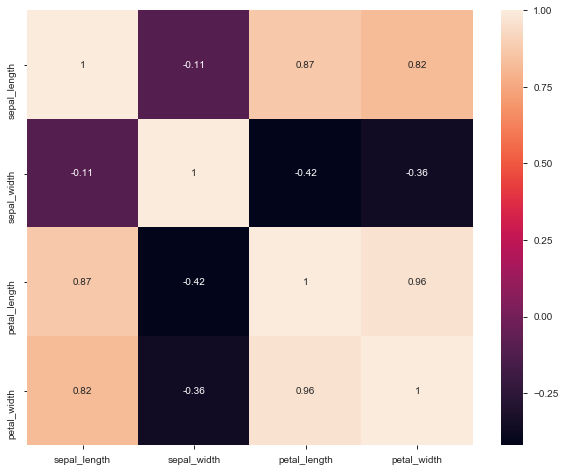

In [11]:
plt.figure(figsize=(10, 8))
sb.heatmap(irisdata_df_corr, annot=True)

<a id=section302></a>
### Different plots


<b> Check the scatter using matplotlib package using sepal length and sepal width <b>

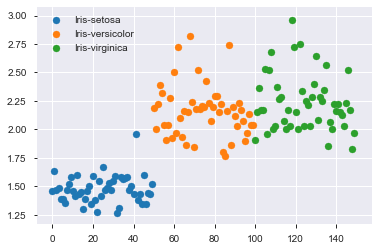

In [12]:

ratio = irisdata_df["sepal_length"]/irisdata_df["sepal_width"]

for name, group in irisdata_df.groupby("species"):
    plt.scatter(group.index, ratio[group.index], label=name)

plt.legend()
plt.show()

<b> Check the scatter using matplotlib package using petal length and petal width <b>

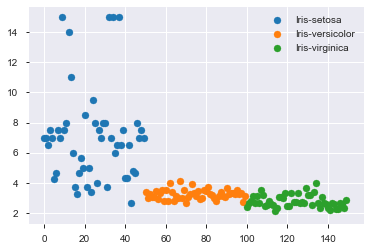

In [13]:
ratio = irisdata_df["petal_length"]/irisdata_df["petal_width"]

for name, group in irisdata_df.groupby("species"):
    plt.scatter(group.index, ratio[group.index], label=name)

plt.legend()
plt.show()

<b> Check the pair plot using matplotlib using species (class of the flowers) <b>

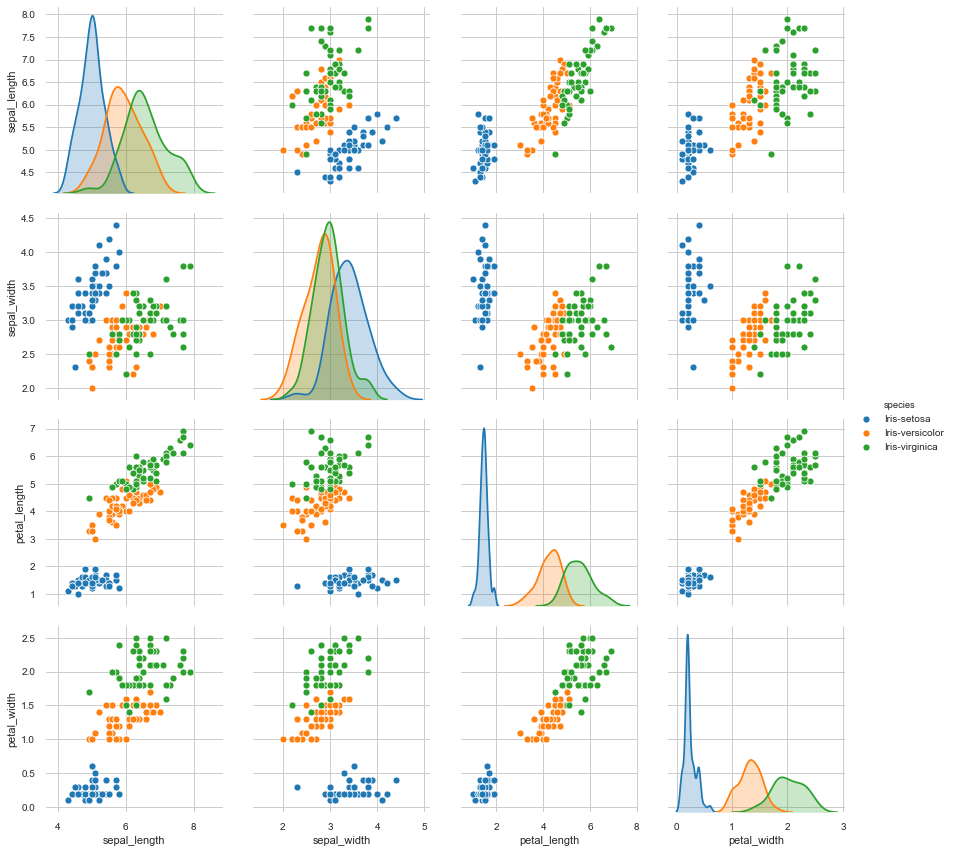

In [14]:
sb.set_style("whitegrid")
sb.pairplot(irisdata_df, hue="species", height=3)
plt.show()


Text(0.5, 1.0, 'General Statistics of Iris Dataset')

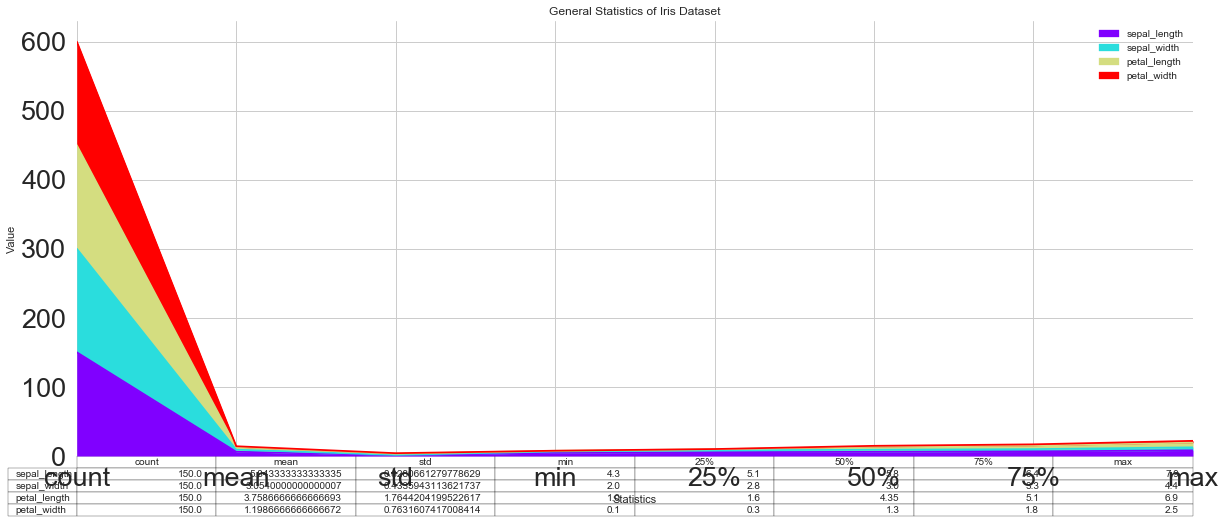

In [15]:
irisdata_df.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Iris Dataset")

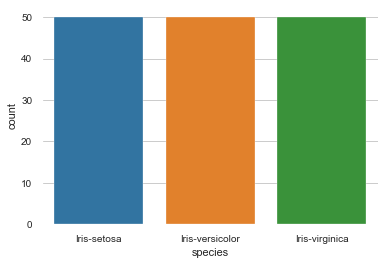

In [16]:
sb.countplot('species',data=irisdata_df)
plt.show()

<b> Combining Box and Strip Plots <b>


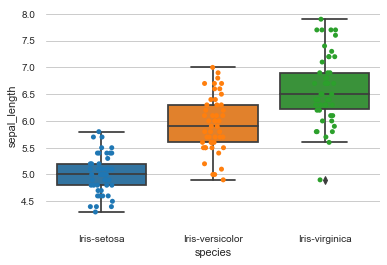

In [17]:
ax=sb.boxplot(x='species',y='sepal_length',data=irisdata_df)
ax=sb.stripplot(x='species',y='sepal_length',data=irisdata_df,jitter=True,edgecolor='gray')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B2EC08CD68>,
      dtype=object)

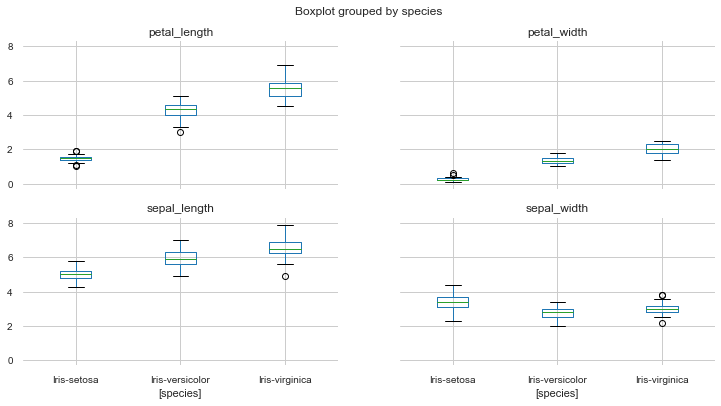

In [18]:
irisdata_df.boxplot(by="species", figsize=(12, 6))

<b> Distribution Plot <b>

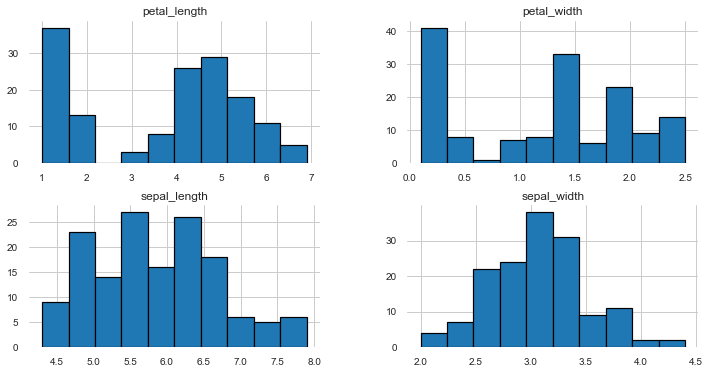

In [19]:
irisdata_df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<b> Violin Plot <b>

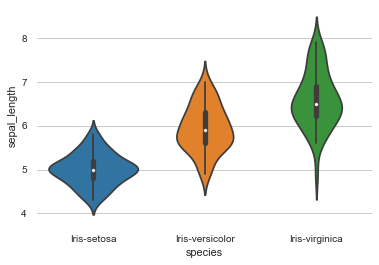

In [20]:
sb.violinplot(x='species',y='sepal_length',data=irisdata_df,size=6)

<b>Pie Chart<b>

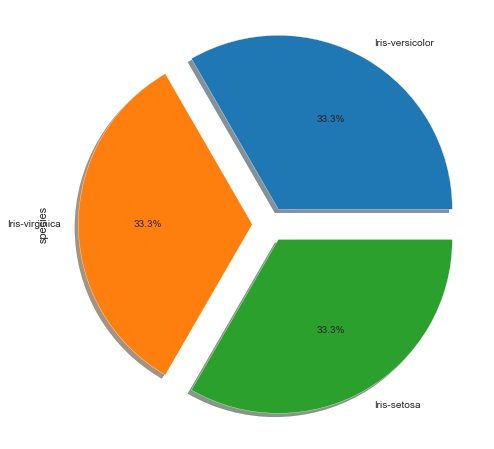

In [21]:
irisdata_df['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

<b> Joint Plot <b>

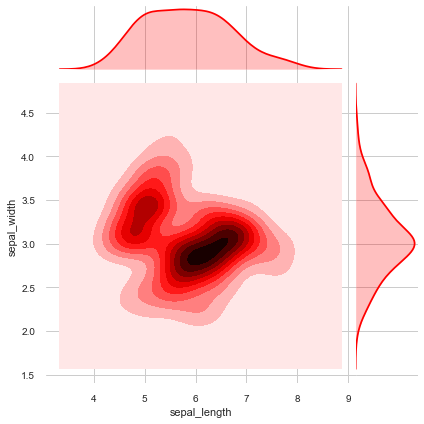

In [22]:
sb.jointplot("sepal_length", "sepal_width", data=irisdata_df, kind="kde",space=0,color='r')

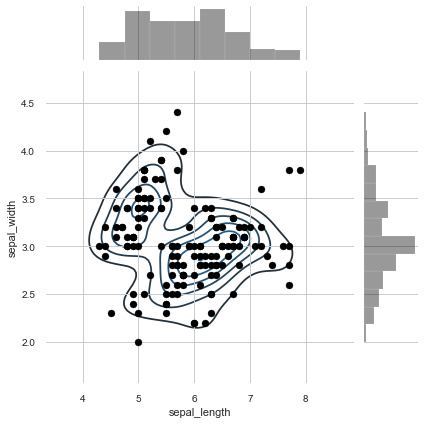

In [23]:
g = (sb.jointplot("sepal_length", "sepal_width",data=irisdata_df, color="k").plot_joint(sb.kdeplot, zorder=0, n_levels=6))

<b> Area Plot <b>

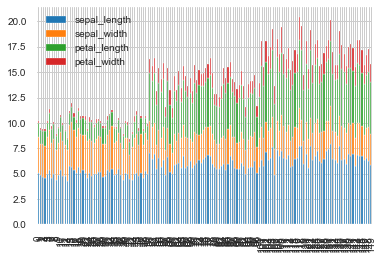

In [24]:
irisdata_df.plot.bar(stacked=True)

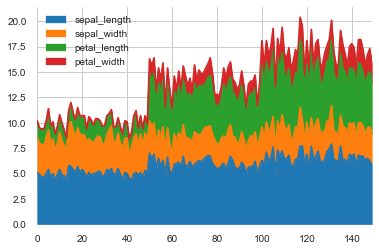

In [25]:
irisdata_df.plot.area()

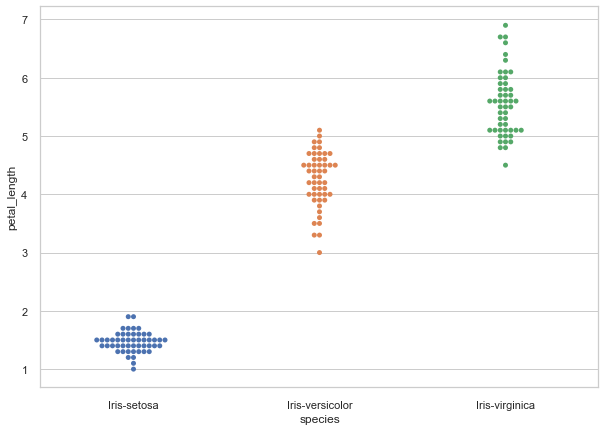

In [26]:
sb.set(style="whitegrid")
fig=plt.gcf()
fig.set_size_inches(10,7)
fig = sb.swarmplot(x="species", y="petal_length", data=irisdata_df)

<a id=section4></a>
## Model Training and Prediction

<a id=section401></a>
#### Splitting X and Y into training and test datasets

In [27]:
X = irisdata_df.iloc[:, :-1].values # attributes to determine dependent variable / Class

In [28]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [29]:
Y = irisdata_df.iloc[:, -1].values  # dependent variable / Class
print(Y)


['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

<a id=section402></a>
### Applying Label Encoding to Target Variable "species" to convert to numerical 

In [30]:
# encode categorical data
from sklearn import preprocessing
labelencoder_Y = preprocessing.LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<a id=section403></a>
### Apply the GaussianNB Classifier

__Splitting X and Y into training and test datasets__

In [31]:
from sklearn.model_selection import train_test_split

gnbx_train, gnbx_test, gnby_train, gnby_test = train_test_split(X, Y, test_size=0.2)

In [32]:
gnbx_train.shape, gnby_train.shape

((120, 4), (120,))

In [33]:
gnbx_test.shape, gnby_test.shape

((30, 4), (30,))

In [34]:
from sklearn.naive_bayes import GaussianNB
gaussianNBModel = GaussianNB()
gnby_predict = gaussianNBModel.fit(gnbx_train, gnby_train).predict(gnbx_test)
print("Number of mislabeled points out of a total %d points : %d" %(gnbx_test.shape[0], (gnby_test != gnby_predict).sum()))

Number of mislabeled points out of a total 30 points : 2


<a id=section404></a>
### Check the Accuracy, Precision,  Recall and F1 scores for GaussianNB Classifier

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score

In [36]:
f1score = f1_score(gnby_test, gnby_predict, average = "macro")
accuracy = accuracy_score(gnby_test, gnby_predict)
precision = precision_score(gnby_test, gnby_predict,pos_label='positive',average='micro')
recall = recall_score(gnby_test, gnby_predict,pos_label='positive',average='micro')

print('F1 Score is---->', f1score)
print('Accuracy Score is--->:', accuracy)
print('Precision Score is--->:', precision)
print('Recall Score is--->:', recall)

F1 Score is----> 0.9285714285714285
Accuracy Score is--->: 0.9333333333333333
Precision Score is--->: 0.9333333333333333
Recall Score is--->: 0.9333333333333333


__Confusion Matrix__

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(gnby_test, gnby_predict)

pred_results = pd.DataFrame({'Actual': gnby_test, 'Predicted': gnby_predict})
pred_results.head()

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1


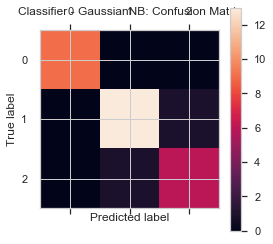

In [38]:

plt.matshow(cm)
plt.title('Classifier - GaussianNB: Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<a id=section405></a>
### Apply the BernoulliNB Classifier

__Splitting X and Y into training and test datasets__

In [39]:
bnbx_train, bnbx_test, bnby_train, bnby_test = train_test_split(X, Y, test_size=0.2)

In [40]:
from sklearn.naive_bayes import BernoulliNB
bernouliNBModel = BernoulliNB()
bnby_predict = bernouliNBModel.fit(bnbx_train, bnby_train).predict(bnbx_test)
print("Number of mislabeled points out of a total %d points : %d" %(bnbx_test.shape[0], (bnby_test != bnby_predict).sum()))

Number of mislabeled points out of a total 30 points : 24


<a id=section406></a>
### Check the Accuracy, Precision,  Recall and F1 scores for BernoulliNB Classifier

In [41]:
f1score = f1_score(bnby_test, bnby_predict, average = "macro")
accuracy = accuracy_score(bnby_test, bnby_predict)
precision = precision_score(bnby_test, bnby_predict,pos_label='positive',average='micro')
recall = recall_score(bnby_test, bnby_predict,pos_label='positive',average='micro')


print('F1 Score is---->', f1score)
print('Accuracy Score is--->:', accuracy)
print('Precision Score is--->:', precision)
print('Recall Score is--->:', recall)


F1 Score is----> 0.11111111111111112
Accuracy Score is--->: 0.2
Precision Score is--->: 0.2
Recall Score is--->: 0.2


__Confusion Matrix__

In [42]:
from sklearn.metrics import confusion_matrix

cmbnb = confusion_matrix(bnby_test, bnby_predict)

pred_results = pd.DataFrame({'Actual': bnby_test, 'Predicted': bnby_predict})
pred_results.head()

,Actual,Predicted
0,0,2
1,2,2
2,1,2
3,0,2
4,0,2


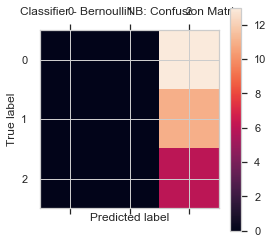

In [43]:

plt.matshow(cmbnb)
plt.title('Classifier - BernoulliNB: Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<a id=section407></a>
### Apply the MultinomialNB Classifier


__Splitting X and Y into training and test datasets__

In [44]:
mnbx_train, mnbx_test, mnby_train, mnby_test = train_test_split(X, Y, test_size=0.2)

In [45]:
from sklearn.naive_bayes import MultinomialNB
mnbModel = MultinomialNB()
mnby_predict = mnbModel.fit(mnbx_train, mnby_train).predict(mnbx_test)
print("Number of mislabeled points out of a total %d points : %d" %(mnbx_test.shape[0], (mnby_test != mnby_predict).sum()))

Number of mislabeled points out of a total 30 points : 9


<a id=section408></a>
### Check the Accuracy, Precision,  Recall and F1 scores for MultinomialNB Classifier

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

f1score = f1_score(mnby_test, mnby_predict, average = "macro")
accuracy = accuracy_score(mnby_test, mnby_predict)
precision = precision_score(mnby_test, mnby_predict,pos_label='positive',average='micro')
recall = recall_score(mnby_test, mnby_predict,pos_label='positive',average='micro')

print('F1 Score is---->', f1score)
print('Accuracy Score is--->:', accuracy)
print('Precision Score is--->:', precision)
print('Recall Score is--->:', recall)

F1 Score is----> 0.6806722689075632
Accuracy Score is--->: 0.7
Precision Score is--->: 0.7
Recall Score is--->: 0.7


__Confusion Matrix__

In [47]:
from sklearn.metrics import confusion_matrix

cmmnb = confusion_matrix(mnby_test, mnby_predict)

pred_results = pd.DataFrame({'Actual': mnby_test, 'Predicted': mnby_predict})
pred_results.head()



,Actual,Predicted
0,0,0
1,2,1
2,1,1
3,2,2
4,0,0


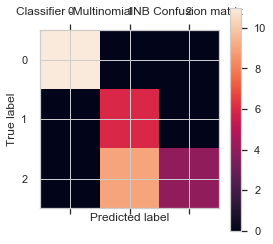

In [48]:
plt.matshow(cmmnb)
plt.title('Classifier -MultinomialNB Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<a id=section5></a>
## Plotting Decision Boundry 

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2)

In [50]:
import pylab as pl
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


def plot_classification_results(clf, X, Y, title):
    # Divide dataset into training and testing parts
    x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2)

    # Fit the data with classifier.
    clf.fit(x_train, y_train)

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    h = .02  # step size in the mesh
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold)

    y_predicted = clf.predict(x_test)
    score = clf.score(x_test, y_test)
    pl.scatter(x_test[:, 0], x_test[:, 1], c=y_predicted, alpha=0.5, cmap=cmap_bold)
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    pl.xlabel('sepal_length')
    plt.ylabel('sepal_width')
    pl.title(title)
    return score

__Decision Boundry for GaussianNB__

0.8333333333333334

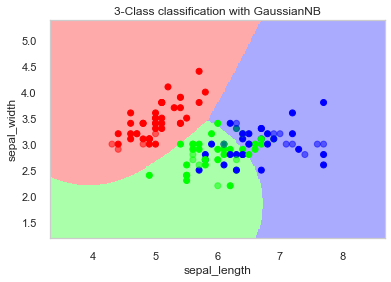

In [51]:
plot_classification_results(gaussianNBModel, x_train[:, :2], y_train, "3-Class classification with GaussianNB")

__Decision Boundry for BernouliNB__

0.20833333333333334

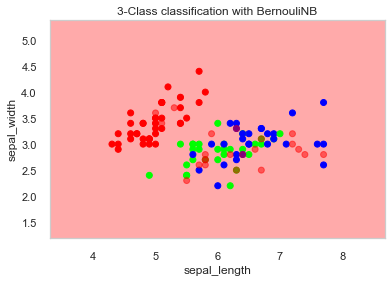

In [52]:
plot_classification_results(bernouliNBModel, x_train[:, :2], y_train, "3-Class classification with BernouliNB")

__Decision Boundry for MultinomialNB__

0.5

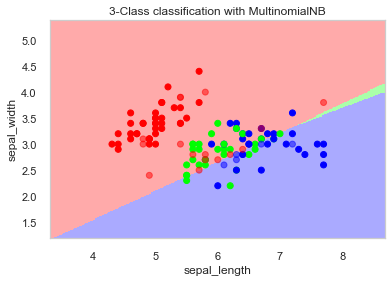

In [53]:
plot_classification_results(mnbModel, x_train[:, :2], y_train, "3-Class classification with MultinomialNB")

<a id=section6></a>
### Inferences and Conclusions

-- It isn’t too large (only 150 rows).<br/> 
-- There are no missing values present in given dataset.  <br/>
-- Features speal length, petal length and petal width are highly positively correlated.  <br/>
-- Due to multi colinarity between the features there is a miscalssification between the Iris-versicolor and Iris-    virginica. These two flower categories are not linearly separable from each other. Where as Iris-setosa is seperated from Iris-versicolor and Iris- virginica. <br/>
-- There appear to be some “errors” (as in misclassifications),so it isn’t “pure” data. <br/>  
-- Out of GaussianNB, BernoulliNB and MultinomialNB both GaussianNB and MultinomialNB giving smilar accuracy scores. BernoulliNB classifier is not performing well. <br/>

__Copmarision Between GaussianNB, BernoulliNB and MultinomialNB Models__

Gaussian Naive Bayes model is generally used for continuous data (where each feature is a real number), where the underlying data distribution is assumed to be a Gaussian (Normal) distribution.

The Multinomial Naive Bayes model counts how often a certain event occurs in the dataset (for example how often a certain word occurs in a document).

The Bernoulli Naive Bayes model is similar to the Multinomial Naive Bayes model, but instead of counting how often an event occurred, it only describes whether or not an event occurred (for example whether or not a certain word occurs in a document, where it doesn't matter if it occurs once or 100000 times)

For the given Iris Dataset, which contains real valued data, the GaussianNB would be the most suitable model. 

For the given characteristics of iris dataset and each model, Bernoulli Naive Bayes model didn't do very well. Out of __30 datapoints almost 21 are misclassified.__

The larger surprise is that the Multinomial Naive Bayes model did almost as well as the Gaussian model even though its an inappropriate choice for this dataset (real valued data). 

